In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score ,r2_score, mean_squared_error


In [2]:
data = pd.read_csv("insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data.groupby("region").mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [5]:
data = data.replace({"sex":{"male":0,"female":1}})
data = data.replace({"region":{"northeast":0,"northwest":1,"southeast":2,"southwest":4}})
data = data.replace({"smoker":{"yes":0,"no":1}})


data


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,4,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,0,2205.98080
1335,18,1,36.850,0,1,2,1629.83350
1336,21,1,25.800,0,1,4,2007.94500


In [6]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,4,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,0,2205.98080
1335,18,1,36.850,0,1,2,1629.83350
1336,21,1,25.800,0,1,4,2007.94500


<AxesSubplot:>

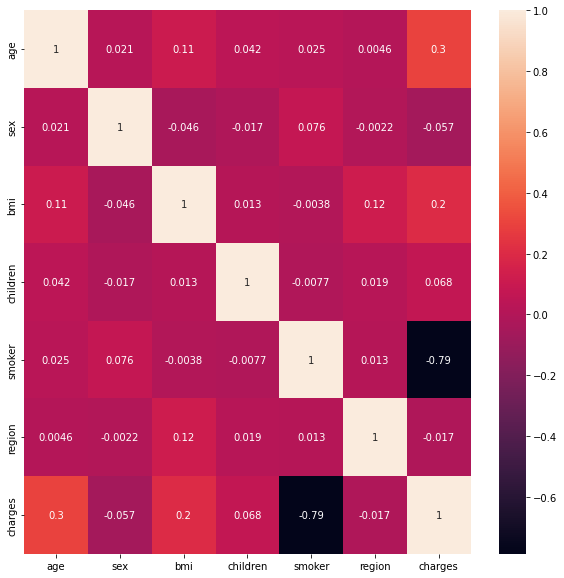

In [7]:
import matplotlib.pyplot as plt


correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True)


In [8]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,4,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


In [9]:
x = data.drop(columns="charges",axis=1)
y = data["charges"]


In [10]:
print(y)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [13]:

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [14]:
from sklearn import metrics
prediction = model.predict(x_test)
r2_test = metrics.r2_score(y_test,prediction)

print(r2_test)


0.7440462061881572


In [15]:
y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

In [16]:
print(prediction[232])
print(y_test[232])

8380.768181717613
1727.785


In [17]:
input_data = (19,1,27.900,0,0,4)
input_data_arr = np.asarray(input_data)

input_data_reshape = input_data_arr.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)



[25150.67152281]


c:\Users\Huawei D14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


xgrboost


In [18]:
from xgboost import XGBRegressor
model2 = XGBRegressor()

model2.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [19]:
prediction2 = model2.predict(x_test)

print(y_test[2])
print(prediction2[2])

scoree_1 = metrics.r2_score(y_test,prediction2)
print("this is r score value -->",scoree_1)



4449.462
13219.308
this is r score value --> 0.8244198401779491


In [20]:
input_data = (19,1,27.900,0,0,4)
input_data_arr = np.asarray(input_data)

input_data_reshape = input_data_arr.reshape(1,-1)

prediction = model2.predict(input_data_reshape)

print(prediction)

[17124.408]


In [21]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,4,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,0,2205.98080
1335,18,1,36.850,0,1,2,1629.83350
1336,21,1,25.800,0,1,4,2007.94500


In [22]:
def give(o,t,T,f,F,s):
    
    data_input_arr = np.asarray([o,t,T,f,F,s])

    data_input_reshape = data_input_arr.reshape(1,-1)

    predictionn = model2.predict(data_input_reshape)
    
    return predictionn



In [23]:
give(18,1,36.850,0,1,2)


array([1454.4624], dtype=float32)